<a href="https://colab.research.google.com/github/hadeswithming23/DeepLearning/blob/main/GroupG_DLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Pandas display options
pd.set_option("display.float_format", "{:.3f}".format)

# Matplotlib defaults
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.grid": True,       # makes plots more readable
    "grid.alpha": 0.3        # subtle grid lines
})

# 2. Read Dataset

In [ ]:
# Load dataset
raw_df = pd.read_csv("https://raw.githubusercontent.com/hadeswithming23/DeepLearning/main/KDDTrain%2B.txt")

# Create a working copy to avoid modifying the raw data
df = raw_df.copy(deep=True)

# Preview the first rows
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


## 2.1 Add Columns Names

In [ ]:
# Define column names for the KDD dataset
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "attack", "level"
]

# Load dataset with column names directly
df = pd.read_csv("https://raw.githubusercontent.com/hadeswithming23/DeepLearning/main/KDDTrain%2B.txt", names=columns)

# Preview
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


## 2.2 Dataset Insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
# Statistical summary
print("\nSummary stats:")
print(df.describe().T)


Summary stats:
                                 count      mean         std   min    25%  \
duration                    125973.000   287.145    2604.515 0.000  0.000   
src_bytes                   125973.000 45566.743 5870331.182 0.000  0.000   
dst_bytes                   125973.000 19779.114 4021269.151 0.000  0.000   
land                        125973.000     0.000       0.014 0.000  0.000   
wrong_fragment              125973.000     0.023       0.254 0.000  0.000   
urgent                      125973.000     0.000       0.014 0.000  0.000   
hot                         125973.000     0.204       2.150 0.000  0.000   
num_failed_logins           125973.000     0.001       0.045 0.000  0.000   
logged_in                   125973.000     0.396       0.489 0.000  0.000   
num_compromised             125973.000     0.279      23.942 0.000  0.000   
root_shell                  125973.000     0.001       0.037 0.000  0.000   
su_attempted                125973.000     0.001       0.045

# 3.0 Data Cleaning

## 3.1 Null Values

In [ ]:
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 0


## 3.2 Duplicates

In [ ]:
# Display duplicate rows (if any)
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

if not duplicates.empty:
    display(duplicates.head())

Number of duplicate rows: 0


## 3.3 Outliers

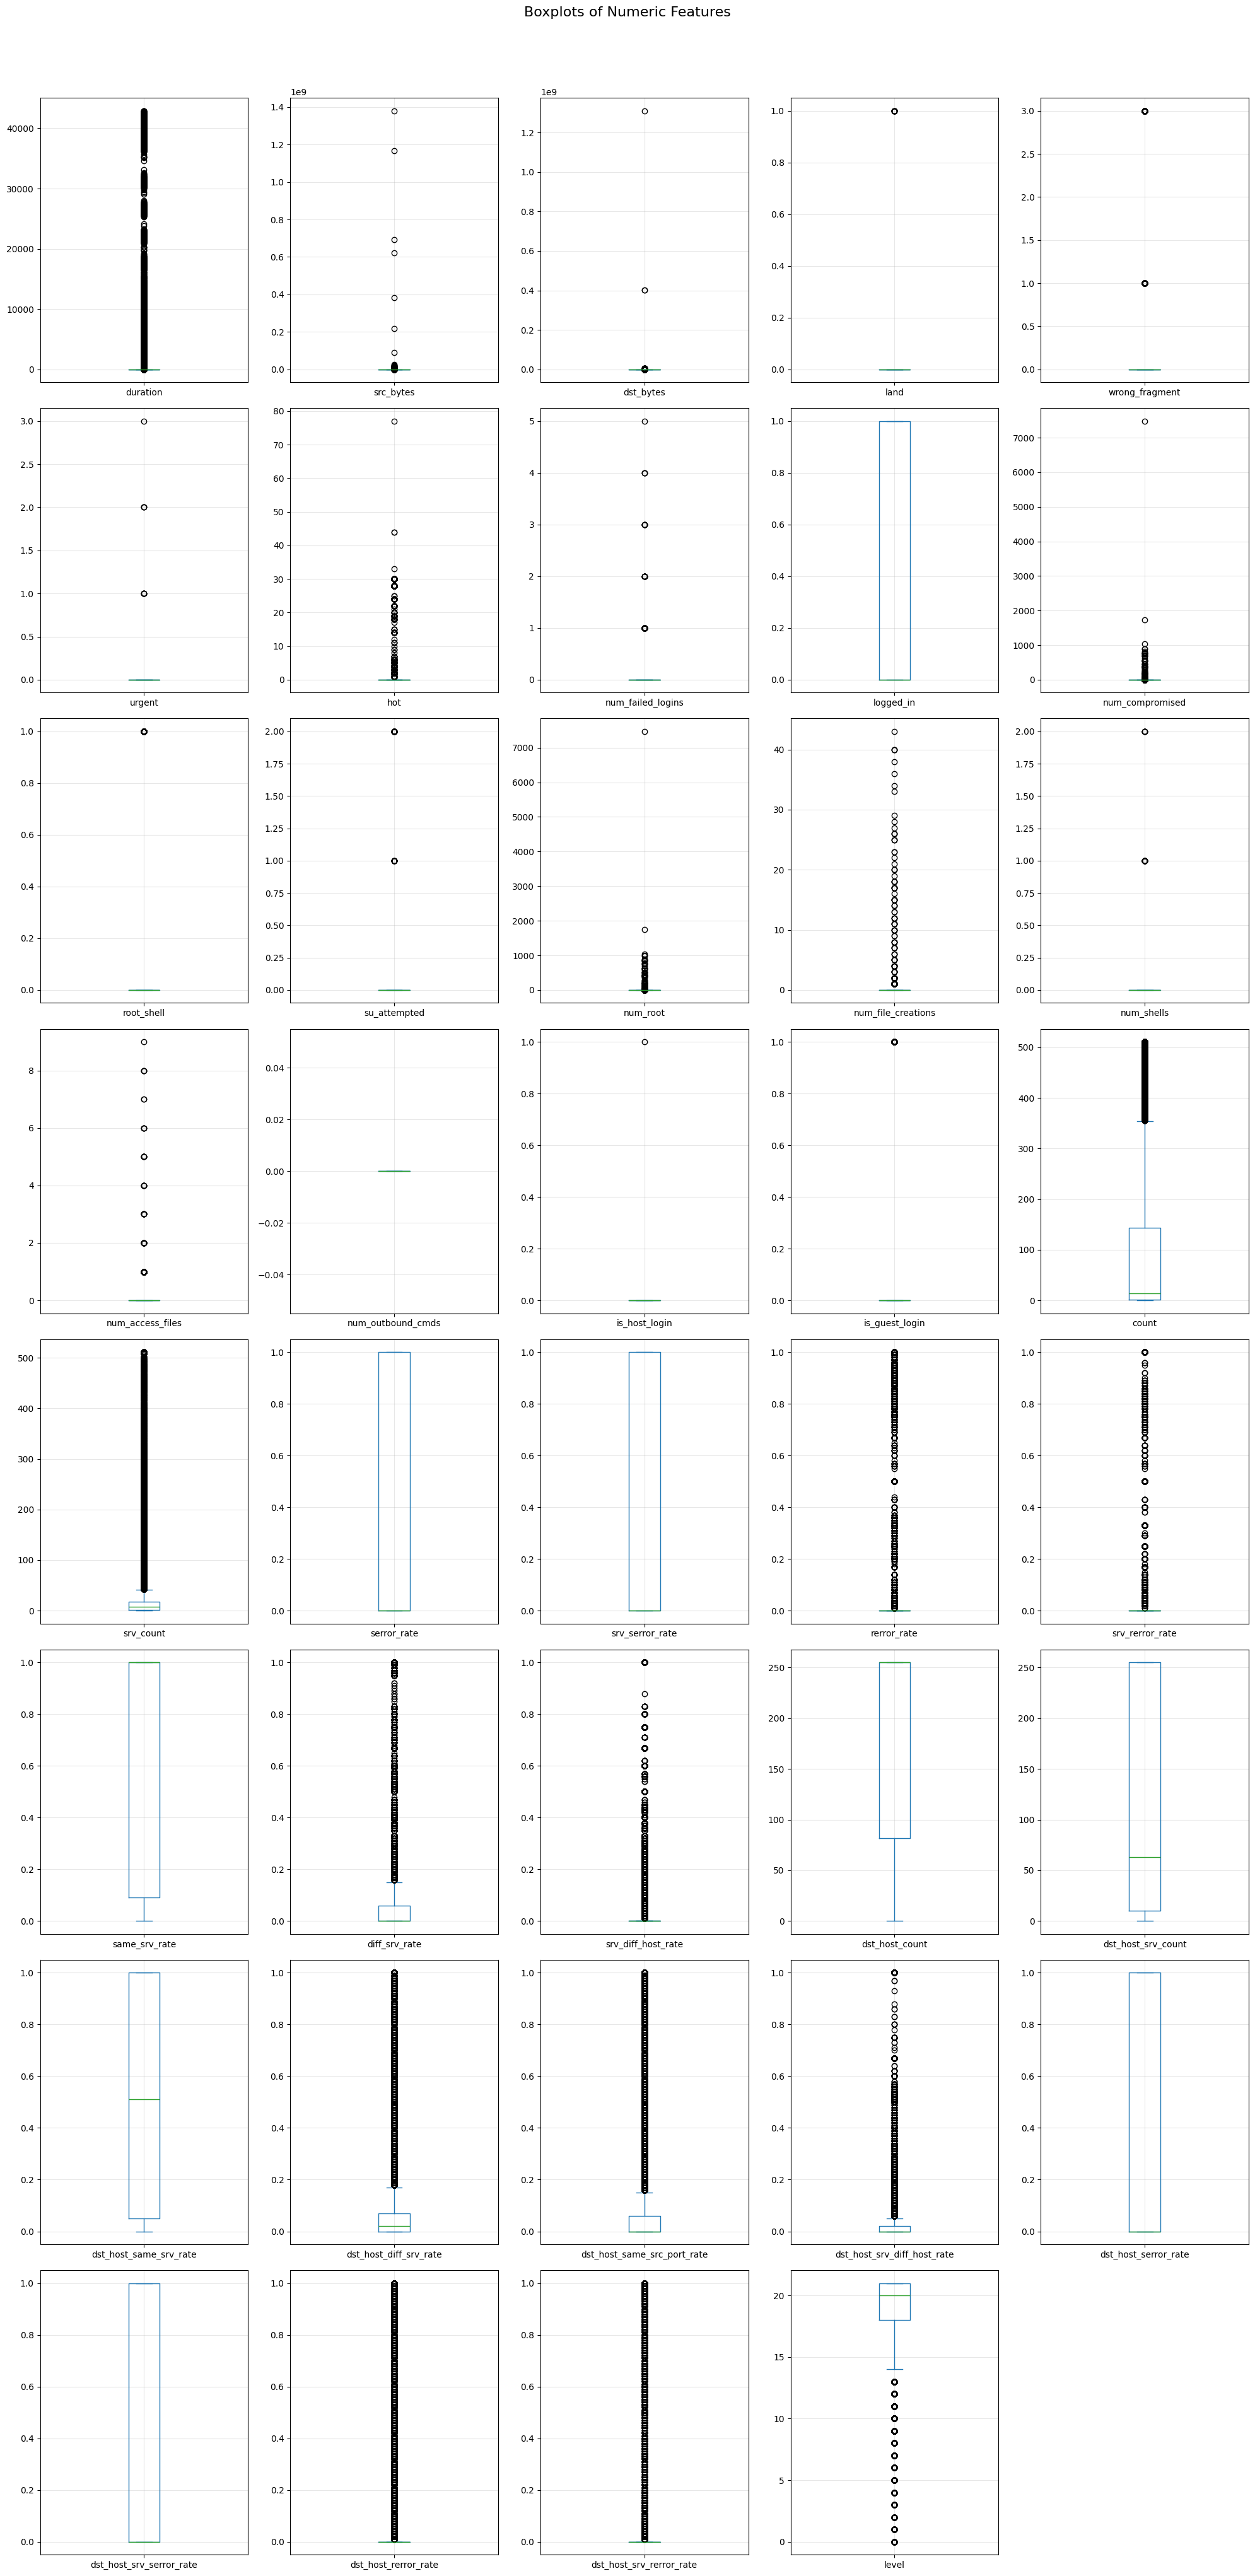

In [ ]:
# Boxplots for all numerical features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].plot(
    kind="box",
    subplots=True,
    layout=(len(numeric_cols)//5 + 1, 5),  # auto-adjust rows
    figsize=(20, 40),
    sharex=False,
    sharey=False
)

plt.suptitle("Boxplots of Numeric Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 3.4 Classifying Attacks In "attack" Column Into attack Or normal

In [ ]:
df['attack'] = np.where(df['attack'] == "normal", "normal", "attack")

df['attack'].unique()

array(['normal', 'attack'], dtype=object)

# 4.0 EDA - Visualisations

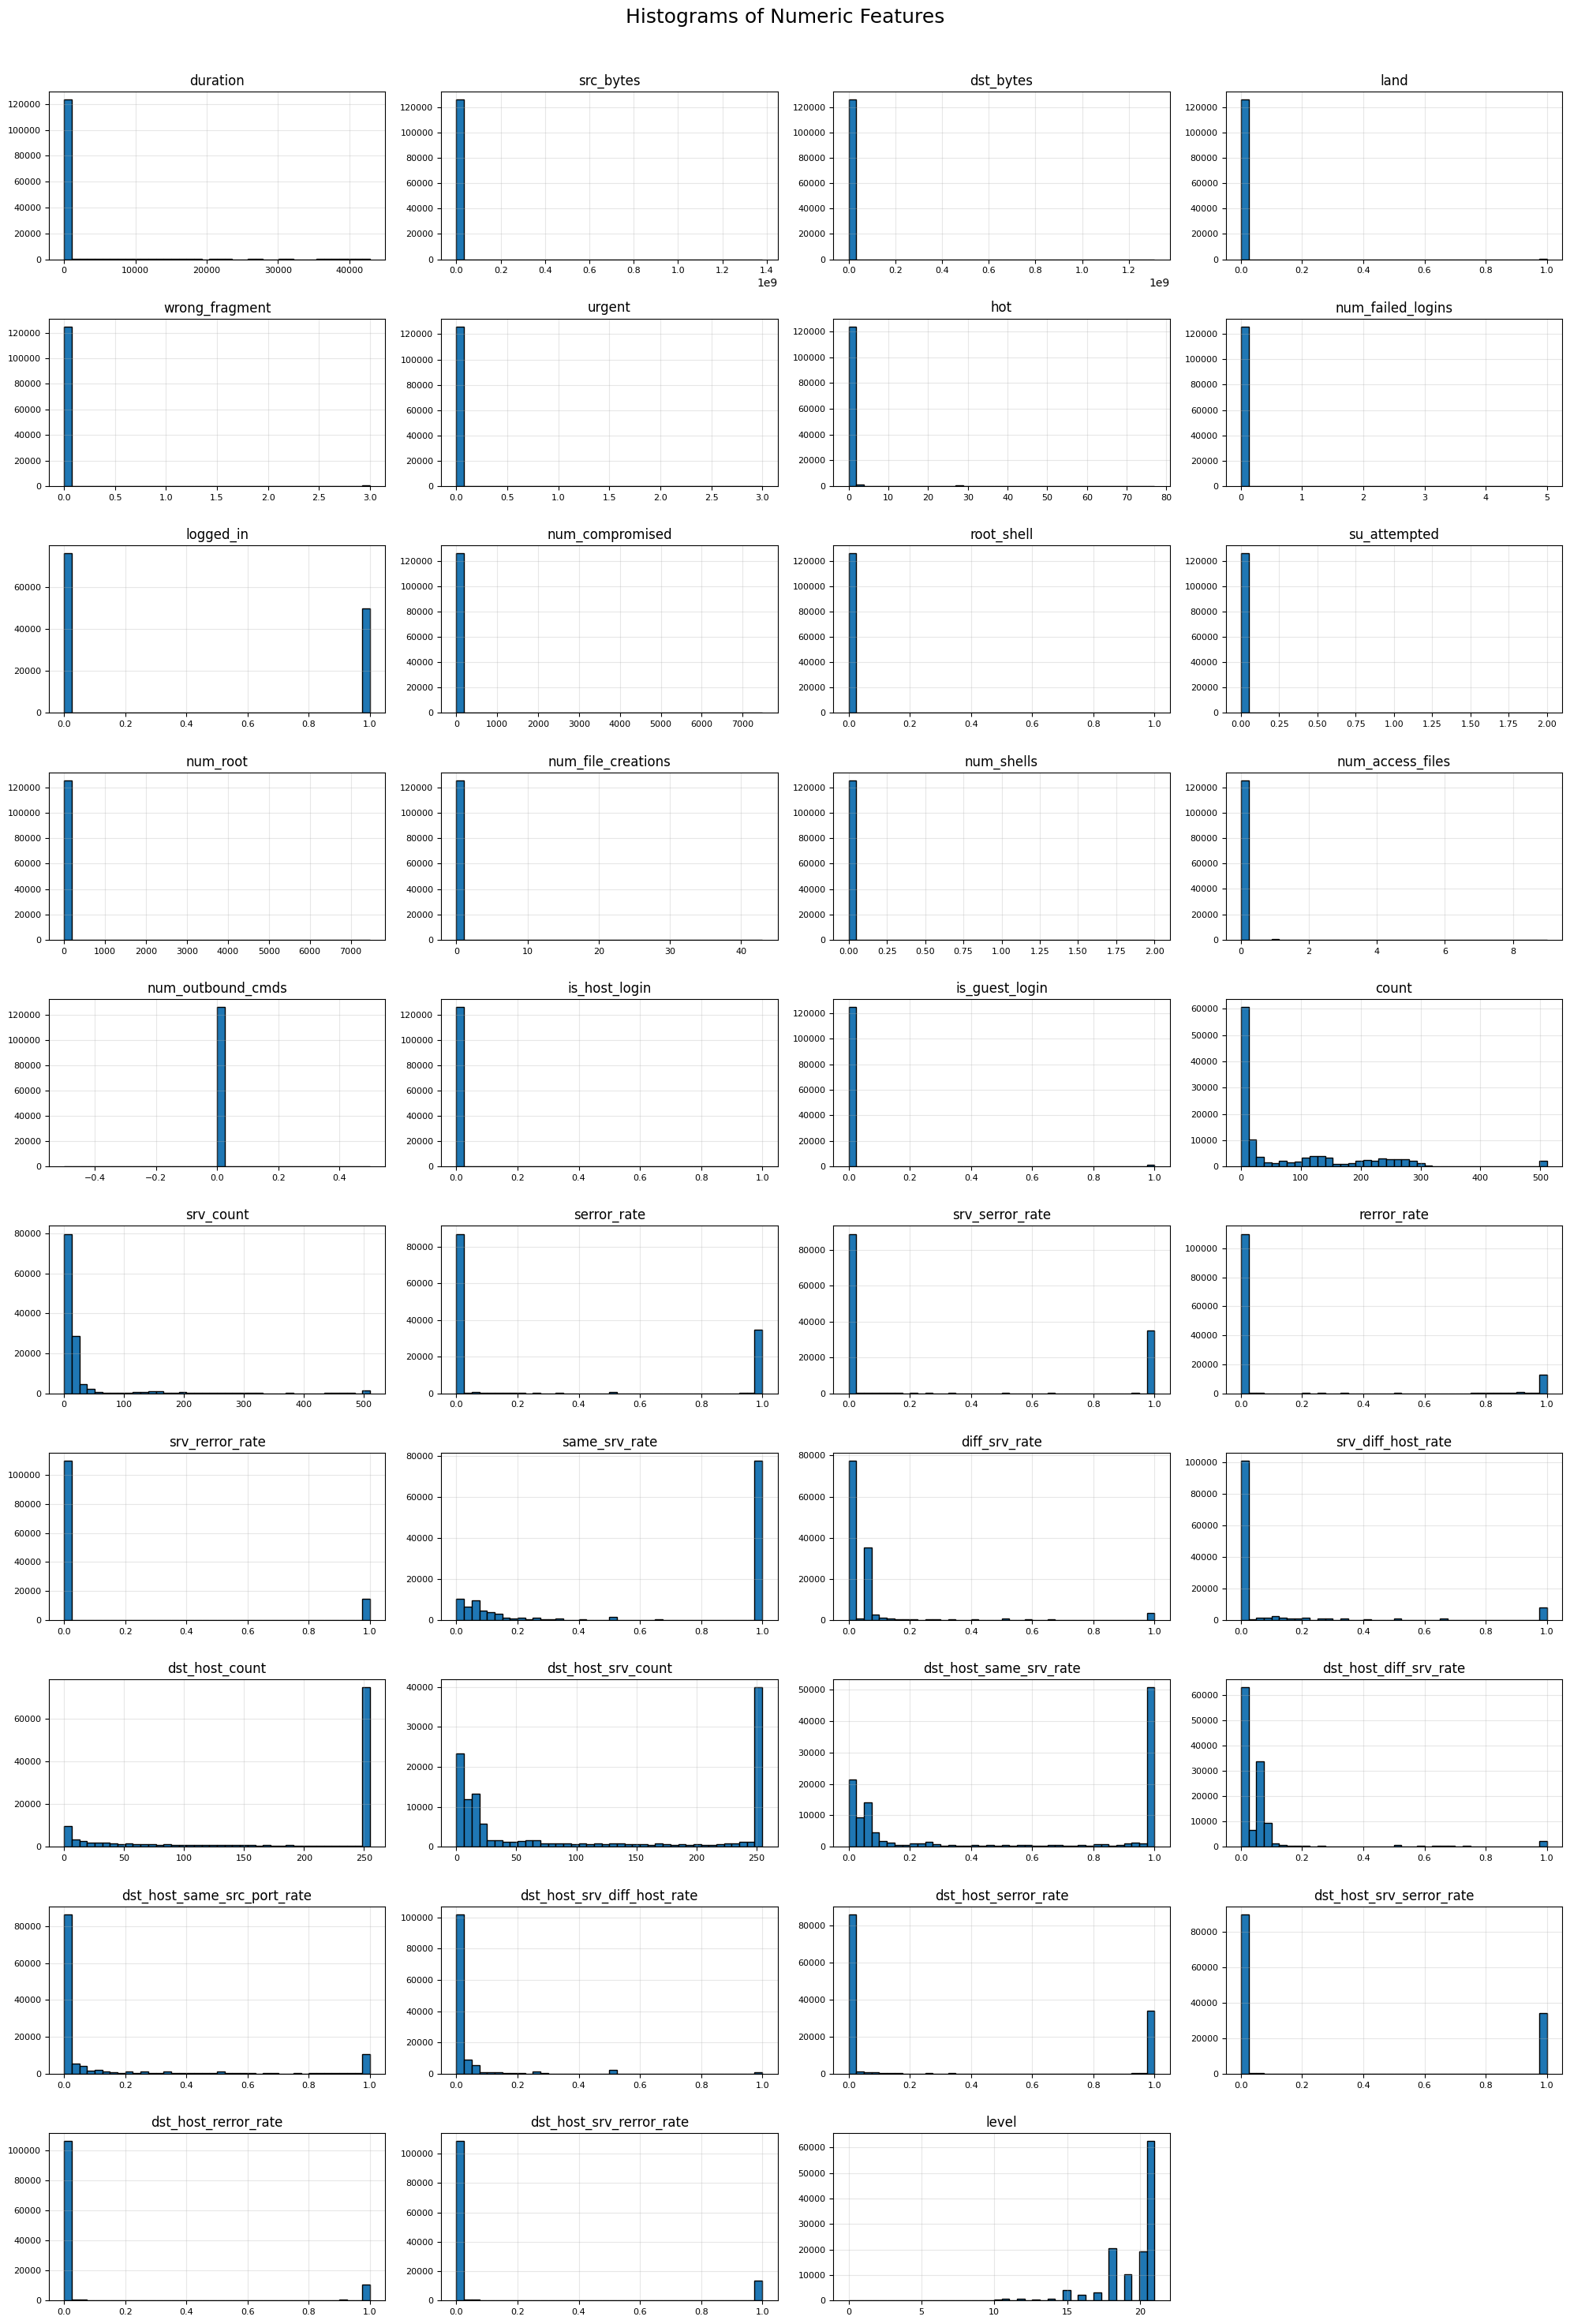

In [ ]:
# Histograms for all numeric features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].hist(
    bins=40,             # number of bins
    figsize=(20, 30),    # figure size
    edgecolor="black",   # better visibility
    layout=(len(numeric_cols)//4 + 1, 4),  # auto layout in 4 columns
    xlabelsize=8, ylabelsize=8
)

plt.suptitle("Histograms of Numeric Features", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## 4.1 Target Variable Distribution

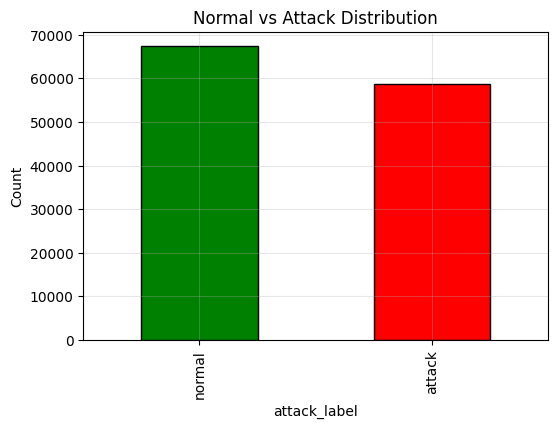


Attack types distribution:
attack
normal    67343
attack    58630
Name: count, dtype: int64


In [ ]:
plot_df = df.copy()
plot_df['attack_label'] = df['attack'].apply(lambda x: "normal" if x == "normal" else "attack")

plt.figure(figsize=(6,4))
plot_df['attack_label'].value_counts().plot(kind="bar", color=["green","red"], edgecolor="black")
plt.title("Normal vs Attack Distribution")
plt.ylabel("Count")
plt.show()

print("\nAttack types distribution:")
print(df['attack'].value_counts().head(10))

## 4.2 Protocol, Service, Flag Analysis

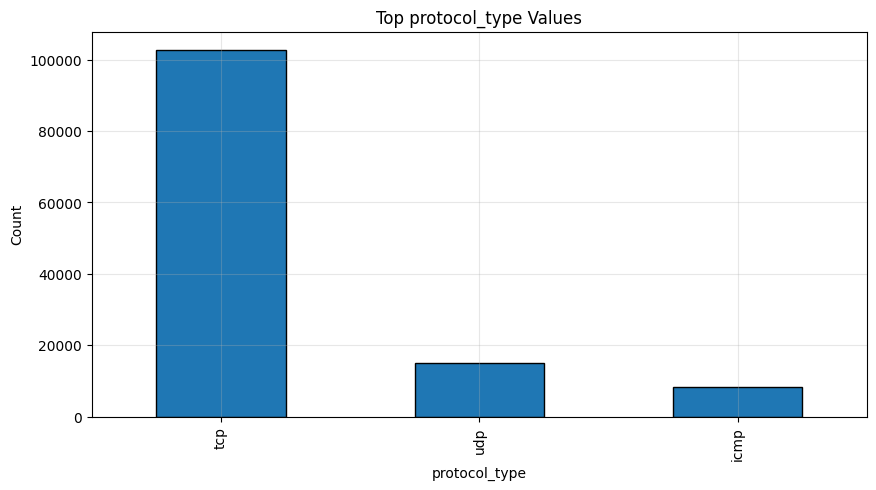

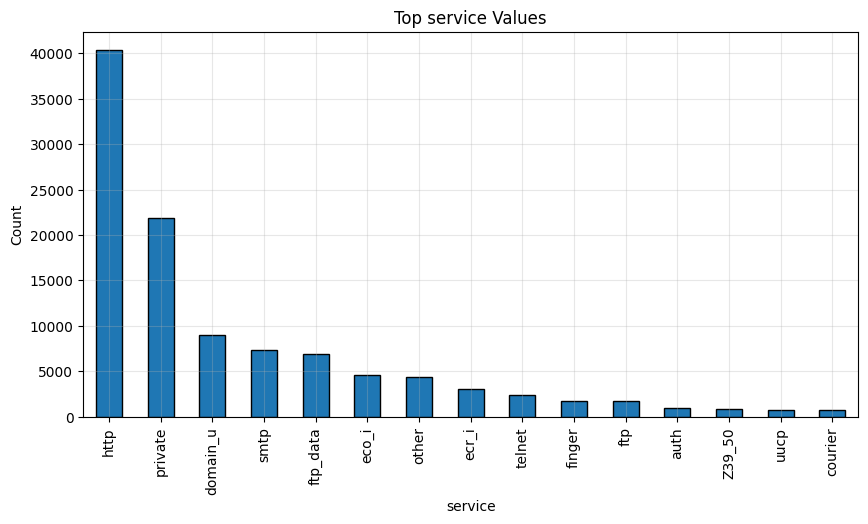

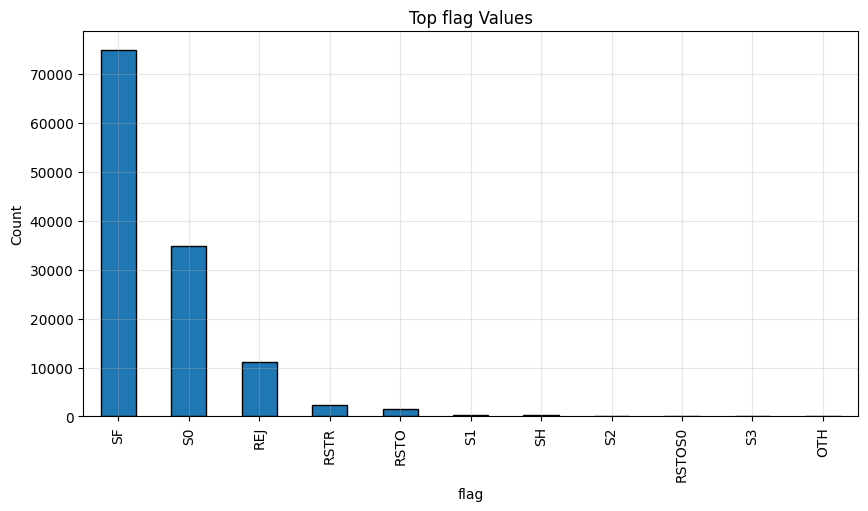

In [ ]:
categorical_cols = ['protocol_type', 'service', 'flag']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", edgecolor="black")
    plt.title(f"Top {col} Values")
    plt.ylabel("Count")
    plt.show()

## 4.3 Attack vs Normal by Protocol

<Figure size 800x500 with 0 Axes>

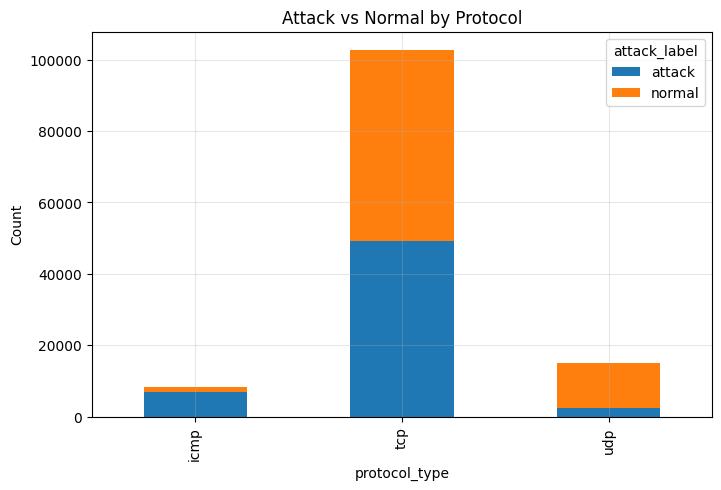

In [ ]:
plt.figure(figsize=(8,5))
pd.crosstab(plot_df['protocol_type'], plot_df['attack_label']).plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Attack vs Normal by Protocol")
plt.ylabel("Count")
plt.show()

## 4.4 Feature Behavior for Attacks



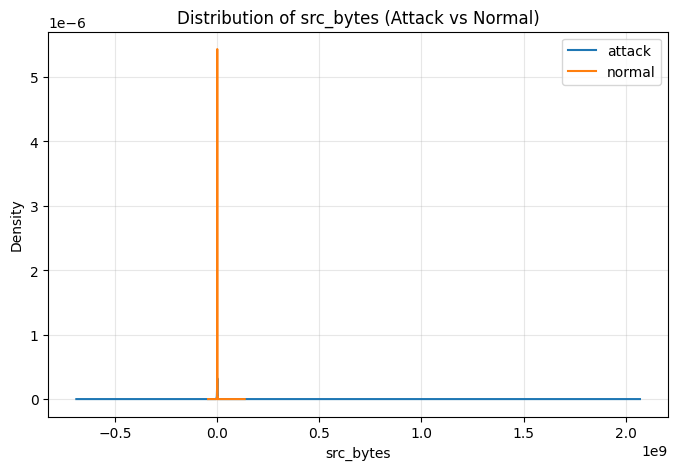

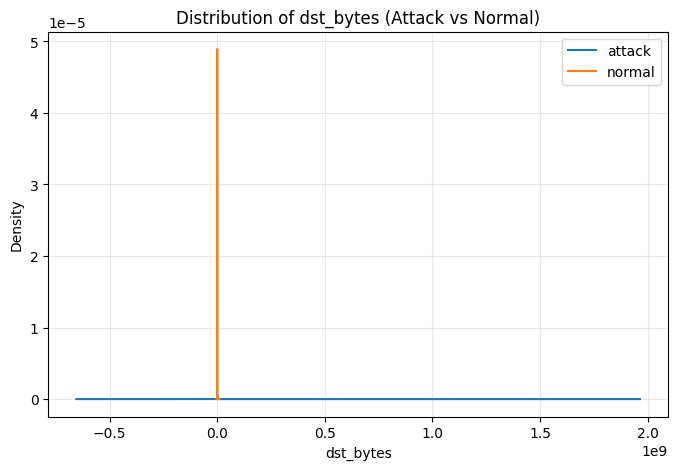

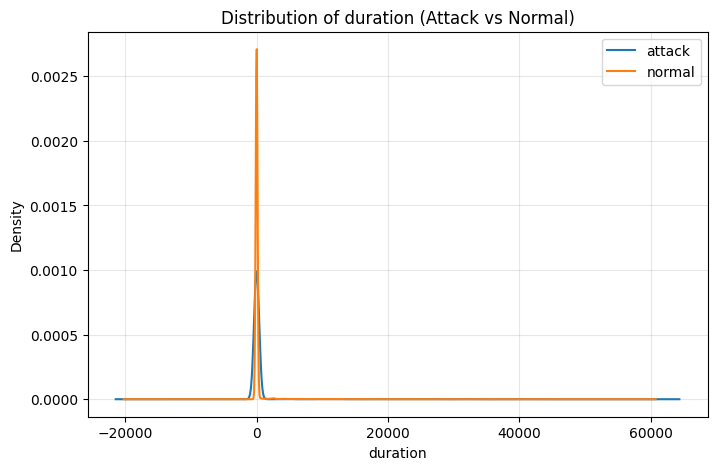

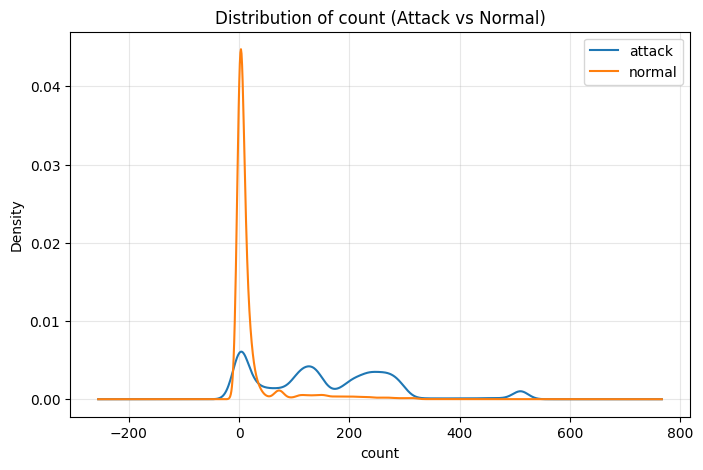

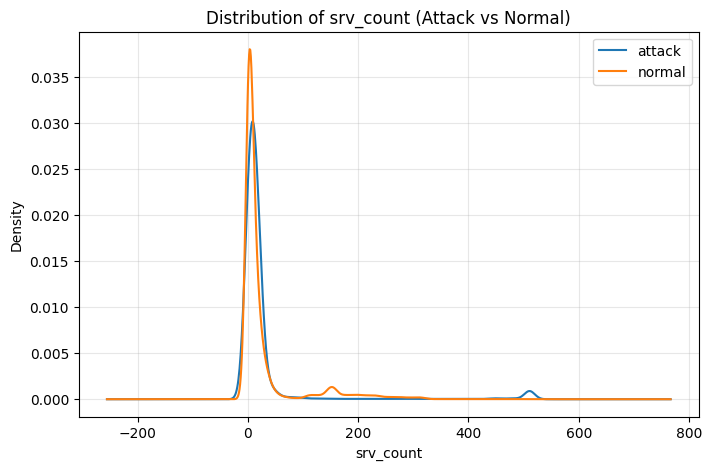

In [ ]:
numeric_cols = ['src_bytes','dst_bytes','duration','count','srv_count']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plot_df.groupby('attack_label')[col].plot(kind="kde", legend=True)
    plt.title(f"Distribution of {col} (Attack vs Normal)")
    plt.xlabel(col)
    plt.show()

## 4.5 Correlation Heatmap (Key Features)

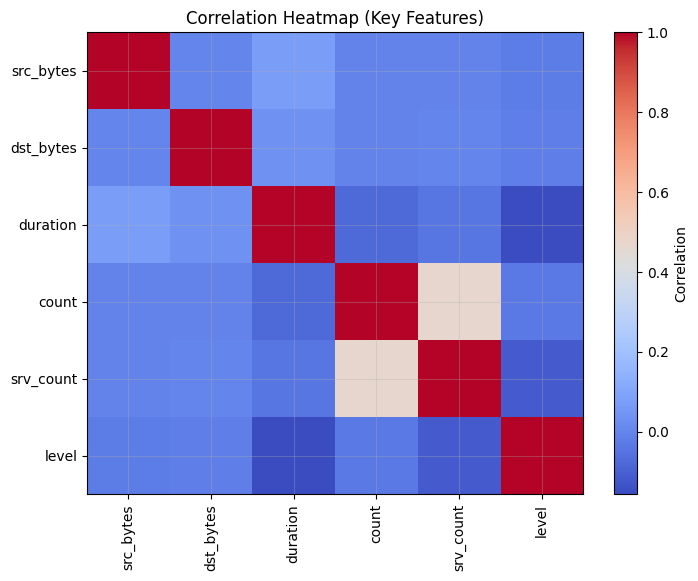

In [ ]:
corr = df[numeric_cols + ['level']].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Key Features)")
plt.show()

# 5.0 Data Preprocessing

## 5.1 Encode Target Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Attack: normal=0, attack=1
le = LabelEncoder()
df['attack_binary'] = le.fit_transform(df['attack'].apply(lambda x: "normal" if x == "normal" else "attack"))

## 5.2 Encode Categorical Features

In [ ]:
# One-Hot for protocol_type and flag (small categories)
df = pd.get_dummies(df, columns=['protocol_type', 'flag'], drop_first=True)

# Frequency Encoding for service (many categories)
service_counts = df['service'].value_counts().to_dict()
df['service_encoded'] = df['service'].map(service_counts)
df = df.drop(columns=['service'])

## 5.3 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['attack','attack_binary'])  # features
y = df['attack_binary']                           # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (88181, 52)
Test shape: (37792, 52)


## 5.4 Feature Engineering: Mutual Information

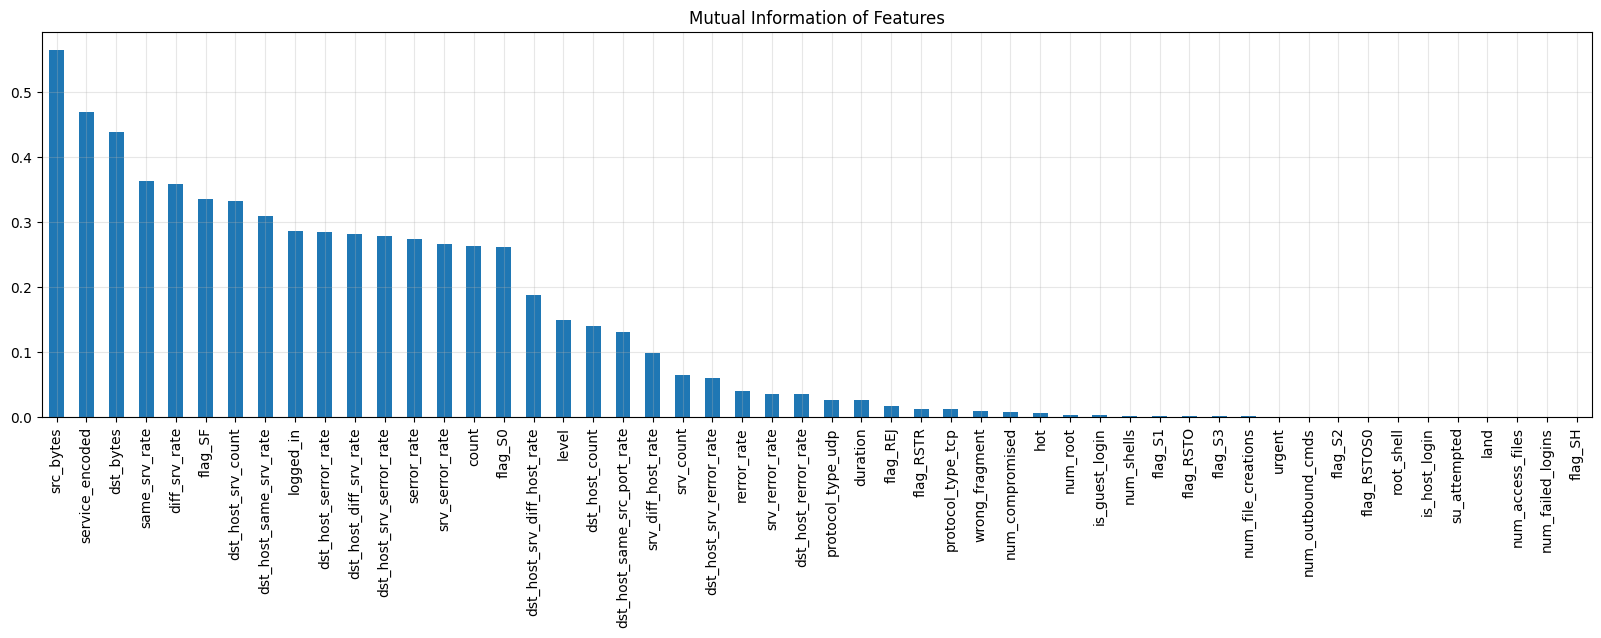

Top features by mutual information:

src_bytes                     0.565
service_encoded               0.469
dst_bytes                     0.439
same_srv_rate                 0.363
diff_srv_rate                 0.359
flag_SF                       0.335
dst_host_srv_count            0.333
dst_host_same_srv_rate        0.309
logged_in                     0.286
dst_host_serror_rate          0.284
dst_host_diff_srv_rate        0.282
dst_host_srv_serror_rate      0.278
serror_rate                   0.273
srv_serror_rate               0.266
count                         0.263
flag_S0                       0.262
dst_host_srv_diff_host_rate   0.187
level                         0.150
dst_host_count                0.139
dst_host_same_src_port_rate   0.130
dtype: float64


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mutual information scores
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info, index=X_train.columns)

# Sort and plot
mutual_info = mutual_info.sort_values(ascending=False)
plt.figure(figsize=(20, 5))
mutual_info.plot(kind="bar")
plt.title("Mutual Information of Features")
plt.show()

# Display top features
print("Top features by mutual information:\n")
print(mutual_info.head(20))

## 5.5 Feature Selection: SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest

# Select top k features
k = 30
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print(f"\nSelected Top {k} Features:\n", list(selected_features))

# For modeling, keep only top 15 features (to balance size vs. performance)
top_n = 15
selected_features_final = list(selected_features[:top_n])
print(f"\nUsing Top {top_n} Features:\n", selected_features_final)

# Reduce train/test sets
X_train_sel = X_train[selected_features_final]
X_test_sel = X_test[selected_features_final]


Selected Top 30 Features:
 ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'protocol_type_udp', 'flag_REJ', 'flag_S0', 'flag_SF', 'service_encoded']

Using Top 15 Features:
 ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count']


## 5.6 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)  # Prevents data leakage

print("Final Train Shape:", X_train_scaled.shape)
print("Final Test Shape:", X_test_scaled.shape)

Final Train Shape: (88181, 15)
Final Test Shape: (37792, 15)


# 6.0 Model Builiding

## 6.1 Train Model Ong Chee Zhung TP065314

In [ ]:
# ============================
# Hybrid IDS: Train Base Models + GBM Meta-Model
# ============================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------
# 0) Preprocess Data
# -----------------------------
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"Number of classes: {num_classes}")
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

# -----------------------------
# 1) Train CNN
# -----------------------------
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn  = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

cnn = models.Sequential([
    layers.Conv1D(32, 3, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation="relu"),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

cnn_train_probs = cnn.predict(X_train_cnn)
cnn_test_probs = cnn.predict(X_test_cnn)

# Save CNN
cnn.save("cnn_model.h5")

# -----------------------------
# 2) Train LSTM
# -----------------------------
X_train_lstm = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_lstm  = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

lstm = models.Sequential([
    layers.LSTM(64, input_shape=(X_train_lstm.shape[1], 1)),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
lstm.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
lstm.fit(X_train_lstm, y_train_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

lstm_train_probs = lstm.predict(X_train_lstm)
lstm_test_probs = lstm.predict(X_test_lstm)

# Save LSTM
lstm.save("lstm_model.h5")

# -----------------------------
# 3) Prepare GBM Meta-Model Features
# -----------------------------
meta_features_train = np.hstack([X_train_scaled, cnn_train_probs, lstm_train_probs])
meta_features_test  = np.hstack([X_test_scaled, cnn_test_probs, lstm_test_probs])

# -----------------------------
# 4) Train GBM Meta-Model
# -----------------------------
meta_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
meta_model.fit(meta_features_train, y_train)
stack_preds = meta_model.predict(meta_features_test)

# -----------------------------
# 5) Evaluate Models
# -----------------------------
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro"),
        "Recall": recall_score(y_true, y_pred, average="macro"),
        "F1_Score": f1_score(y_true, y_pred, average="macro")
    }

cnn_preds = np.argmax(cnn_test_probs, axis=1)
lstm_preds = np.argmax(lstm_test_probs, axis=1)
avg_test_probs = (cnn_test_probs + lstm_test_probs) / 2.0
avg_preds = np.argmax(avg_test_probs, axis=1)

results_list = [
    evaluate_model(y_test, cnn_preds, "CNN"),
    evaluate_model(y_test, lstm_preds, "LSTM"),
    evaluate_model(y_test, avg_preds, "Ensemble_Avg"),
    evaluate_model(y_test, stack_preds, "Ensemble_GBM")
]

# -----------------------------
# 6) Save Results
# -----------------------------
ong_df = pd.DataFrame(results_list)
print("\n=== Model Comparison Results ===")
print(ong_df)


# -----------------------------
# 7) Save GBM Meta-Model
# -----------------------------
joblib.dump(meta_model, "ong_model.pkl")
print("✅ GBM meta-model saved as ong_model.pkl")


Number of classes: 2
y_train_cat shape: (88181, 2)
y_test_cat shape: (37792, 2)
Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8959 - loss: 0.2514 - val_accuracy: 0.9418 - val_loss: 0.1458
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9386 - loss: 0.1475 - val_accuracy: 0.9461 - val_loss: 0.1400
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9428 - loss: 0.1387 - val_accuracy: 0.9472 - val_loss: 0.1345
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9443 - loss: 0.1346 - val_accuracy: 0.9464 - val_loss: 0.1298
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9454 - loss: 0.1315 - val_accuracy: 0.9482 - val_loss: 0.1293
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9456 - loss: 0.1285 - val_accuracy: 0.9504 - val_loss: 0.1201
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9468 - loss: 0.1269 - val_accuracy: 0.9490 - val_loss: 0.1315
Epoch 8/10
552/552 ━━━━━

Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8836 - loss: 0.3223 - val_accuracy: 0.9447 - val_loss: 0.1445
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9422 - loss: 0.1453 - val_accuracy: 0.9487 - val_loss: 0.1260
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9486 - loss: 0.1295 - val_accuracy: 0.9513 - val_loss: 0.1268
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9487 - loss: 0.1287 - val_accuracy: 0.9522 - val_loss: 0.1185
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9510 - loss: 0.1212 - val_accuracy: 0.9524 - val_loss: 0.1169
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9520 - loss: 0.1205 - val_accuracy: 0.9570 - val_loss: 0.1162
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9549 - loss: 0.1167 - val_accuracy: 0.9564 - val_loss: 0.1090
Epoch 8/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9545 - loss: 0.1150 - 


=== Model Comparison Results ===
          Model  Accuracy  Precision  Recall  F1_Score
0           CNN     0.952      0.956   0.950     0.952
1          LSTM     0.960      0.960   0.960     0.960
2  Ensemble_Avg     0.961      0.963   0.960     0.961
3  Ensemble_GBM     0.993      0.993   0.993     0.993
✅ GBM meta-model saved as ong_model.pkl


## 6.2 Model Training Russell Chan TP065645



🔹 XGBClassifier
              precision    recall  f1-score   support

           0    0.99943   0.99955   0.99949     17589
           1    0.99960   0.99951   0.99955     20203

    accuracy                        0.99952     37792
   macro avg    0.99952   0.99953   0.99952     37792
weighted avg    0.99952   0.99952   0.99952     37792

Confusion Matrix:
 [[17581     8]
 [   10 20193]] 

Metrics:
  Accuracy: 0.999524
  Precision: 0.999524
  Recall: 0.999524
  F1-Score: 0.999524


Accuracy: 0.99984124
F1 Score: 0.99985151
Recall: 0.99990100
ROC-AUC: 0.99999945
              precision    recall  f1-score   support

           0    0.99989   0.99977   0.99983     17589
           1    0.99980   0.99990   0.99985     20203

    accuracy                        0.99984     37792
   macro avg    0.99984   0.99984   0.99984     37792
weighted avg    0.99984   0.99984   0.99984     37792


Confusion Matrix (Raw):
[[17585     4]
 [    2 20201]]


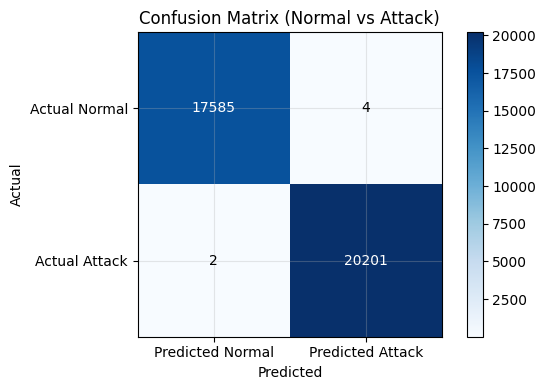

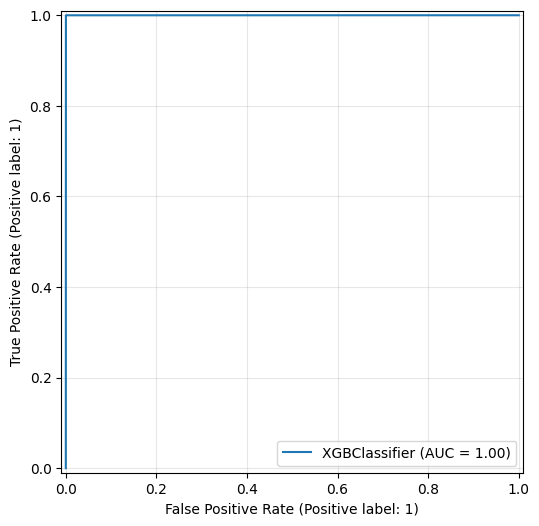

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Pandas display options
pd.set_option("display.float_format", "{:.3f}".format)

# Matplotlib defaults
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.grid": True,       # makes plots more readable
    "grid.alpha": 0.3        # subtle grid lines
})

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train model, evaluate, and return performance metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted")
    }

    return metrics, classification_report(y_test, y_pred, digits=5), confusion_matrix(y_test, y_pred)

# Assuming df and attack_binary are available from previous steps
# If not, you may need to include the data loading and preprocessing steps here

# Train Test Split
X = df.drop(columns=['attack','attack_binary'])  # features
y = df['attack_binary']                           # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Train XGBoost Model Before Applying Hyperparameter Tuning
models = {
    "XGBClassifier": XGBClassifier(random_state = 42)
}

results = {}

for name, model in models.items():
    metrics, report, cm = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[name] = metrics  # keep full precision

    print(f"🔹 {name}")
    print(report)
    print("Confusion Matrix:\n", cm, "\n")

    # Print formatted metrics nicely
    print("Metrics:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.6f}")
    print("\n")

#Hyperparameter Tuning for XGBClassifier
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

XGB_model = XGBClassifier(random_state=42) #initialize the model

# Use the scaled data for hyperparameter tuning
XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train_scaled, y_train)


# Use the best parameters found by GridSearchCV or manually set them
# For now, use the manually set parameters as in the original code
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data using the scaled data
XGB_model.fit(X_train_scaled, y_train)


from sklearn.metrics import RocCurveDisplay

# Predictions
y_pred = XGB_model.predict(X_test_scaled)
y_pred_proba = XGB_model.predict_proba(X_test_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(Results after enhancement)

print(f"Accuracy: {acc:.8f}")
print(f"F1 Score: {f1:.8f}")
print(f"Recall: {recall:.8f}")
print(f"ROC-AUC: {auc:.8f}")

print(classification_report(y_test, y_pred, digits=5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Raw):")
print(cm)

# Plot Confusion Matrix with IDS labels
plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Normal vs Attack)")
plt.colorbar()

# Labels for IDS
classes = ['Normal', 'Attack']
plt.xticks([0, 1], [f'Predicted {cls}' for cls in classes])
plt.yticks([0, 1], [f'Actual {cls}' for cls in classes])

# Annotate values inside the matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()



RocCurveDisplay.from_estimator(XGB_model, X_test_scaled, y_test);

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_test_scaled, y_test, and XGB_model are available from the previous cell

# Predictions
y_pred = XGB_model.predict(X_test_scaled)
y_pred_proba = XGB_model.predict_proba(X_test_scaled)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
auc = roc_auc_score(y_test, y_pred_proba[:, 1])


# Create a DataFrame with the results
russell_df = pd.DataFrame({
    "Model": ["XGBoost"],
    "Accuracy": [acc],
    "Precision": [precision],
    "Recall": [recall],
    "F1_Score": [f1],
    "ROC-AUC": [auc]
})

print("\n=== XGBoost Model Results ===")
# Temporarily set display option for more decimal places
pd.set_option('display.float_format', '{:.7f}'.format)
print(russell_df)
# Revert display option to original setting
pd.set_option('display.float_format', '{:.3f}'.format)


# Save the XGBoost model
joblib.dump(XGB_model, "russell_model.pkl")
print("✅ XGBoost model saved as russell_model.pkl")


=== XGBoost Model Results ===
     Model  Accuracy  Precision    Recall  F1_Score   ROC-AUC
0  XGBoost 0.9998412  0.9998412 0.9998412 0.9998412 0.9999994
✅ XGBoost model saved as russell_model.pkl


## 6.3 Low Sze Shun TP065472

In [ ]:
# Import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import VotingClassifier
import pickle
import os
import numpy as np
import pandas as pd

# Recreate the train-test split (make sure this matches your earlier preprocessing)
# Assuming you have df with the processed features and target variable
print("Recreating train-test split for Decision Tree analysis...")

# Create training variables with dt_ prefix
dt_X = df.drop(columns=['attack', 'attack_category', 'attack_multiclass'])
dt_y = df['attack_multiclass']

# Train-test split for Decision Tree
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(
    dt_X, dt_y, test_size=0.2, random_state=42, stratify=dt_y
)

# Feature selection (using the same approach as before)
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Select top features for Decision Tree
dt_k = 15  # number of features to select
dt_selector = SelectKBest(mutual_info_classif, k=dt_k)
dt_selector.fit(dt_X_train, dt_y_train)

dt_selected_features = dt_X_train.columns[dt_selector.get_support()]
print(f"Selected top {dt_k} features for Decision Tree: {list(dt_selected_features)}")

# Apply feature selection
dt_X_train_sel = dt_X_train[dt_selected_features]
dt_X_test_sel = dt_X_test[dt_selected_features]

# Feature scaling for Decision Tree
dt_scaler = StandardScaler()
dt_X_train_scaled = dt_scaler.fit_transform(dt_X_train_sel)
dt_X_test_scaled = dt_scaler.transform(dt_X_test_sel)

print(f"Decision Tree Train Shape: {dt_X_train_scaled.shape}")
print(f"Decision Tree Test Shape: {dt_X_test_scaled.shape}")

# Define Training & Evaluation Function (Silent Mode)
def dt_evaluate_model_silent(model, X_train, y_train, X_test, y_test, name=None):
    """Train model silently and return performance metrics with fitted model."""
    import time

    # Silent training - no output
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Make predictions silently
    y_pred = model.predict(X_test)

    dt_metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted"),
        "Training_Time": training_time
    }

    return dt_metrics, classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred), model

# Define Training & Evaluation Function (Verbose for Ensemble Only)
def dt_evaluate_model(model, X_train, y_train, X_test, y_test, name=None):
    """Train model, evaluate, and return performance metrics with fitted model."""
    import time

    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    print(f"Training data shape: {X_train.shape}")
    print(f"Number of classes: {len(np.unique(y_train))}")
    print(f"Class distribution: {np.unique(y_train, return_counts=True)}")

    # Start training with timing
    start_time = time.time()
    print(f"\n🚀 Starting training at {time.strftime('%H:%M:%S')}")

    model.fit(X_train, y_train)

    training_time = time.time() - start_time
    print(f"✅ Training completed in {training_time:.2f} seconds")

    # Make predictions
    print("🔍 Making predictions...")
    y_pred = model.predict(X_test)

    dt_metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted"),
        "Training_Time": training_time
    }

    print(f"📊 Model Performance:")
    for metric, value in dt_metrics.items():
        if metric != "Training_Time":
            print(f"   {metric}: {value:.4f}")
        else:
            print(f"   {metric}: {value:.2f}s")

    return dt_metrics, classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred), model

# Initialize results storage
dt_results = {}

# Advanced Decision Tree with LightGBM + Ensemble
print("="*60)
print("Decision Tree with LightGBM + Ensemble Model".center(60))
print("="*60)

# Class Weight Calculation for Imbalanced Data
dt_classes = np.unique(dt_y_train)
dt_class_weights = compute_class_weight(class_weight='balanced', classes=dt_classes, y=dt_y_train)
dt_class_weight_dict = dict(zip(dt_classes, dt_class_weights))
print("Class weights for Decision Tree ensemble:", dt_class_weight_dict)

# Train Base Decision Tree Model (Silent)
dt_base_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_base_metrics, dt_base_report, dt_base_cm, dt_fitted_base = dt_evaluate_model_silent(
    dt_base_model, dt_X_train_scaled, dt_y_train, dt_X_test_scaled, dt_y_test, name="Decision Tree (Base)"
)
dt_results["Decision Tree (Base)"] = dt_base_metrics

# LightGBM Hyperparameter Tuning
dt_param_dist = {
    'num_leaves': randint(50, 500),
    'max_depth': randint(5, 20),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(800, 3000),
    'min_child_samples': randint(10, 100),
    'subsample': uniform(0.6, 0.4),        # [0.6, 1.0]
    'colsample_bytree': uniform(0.4, 0.6), # [0.4, 1.0]
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0),
}

dt_base_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(dt_classes),
    class_weight=dt_class_weight_dict,
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1,
    verbose=-1  # Silent mode - no output
)

dt_search = RandomizedSearchCV(
    estimator=dt_base_lgb,
    param_distributions=dt_param_dist,
    n_iter=50,
    scoring='f1_weighted',
    cv=3,
    verbose=0,  # Silent mode - no progress output
    n_jobs=-1,
    random_state=42
)

# Silent hyperparameter tuning
dt_search.fit(dt_X_train_scaled, dt_y_train)
dt_best_params = dt_search.best_params_

# Train Optimized LightGBM Model (Silent)
dt_lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(dt_classes),
    class_weight=dt_class_weight_dict,
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1,
    verbose=-1,  # Silent mode - no training progress
    **dt_best_params
)

# Evaluate tuned LightGBM silently
dt_lgb_metrics, dt_lgb_report, dt_lgb_cm, dt_lgb_fitted = dt_evaluate_model_silent(
    dt_lgb_model, dt_X_train_scaled, dt_y_train, dt_X_test_scaled, dt_y_test, name="LightGBM (Tuned)"
)
dt_results["LightGBM (Tuned)"] = dt_lgb_metrics

# Create Decision Tree + LightGBM Ensemble
print("\n" + "="*60)
print("🤝 CREATING ENSEMBLE MODEL")
print("="*60)

dt_voter = VotingClassifier(
    estimators=[('dt', dt_fitted_base), ('lgb', dt_lgb_fitted)],
    voting='soft',
    weights=[1, 3]  # favor LightGBM slightly
)

dt_ens_metrics, dt_ens_report, dt_ens_cm, dt_ens_fitted = dt_evaluate_model(
    dt_voter, dt_X_train_scaled, dt_y_train, dt_X_test_scaled, dt_y_test, name="DT+LightGBM Ensemble"
)
dt_results["DT+LightGBM Ensemble"] = dt_ens_metrics

# -----------------------------
# Save Decision Tree Results (Ensemble Only)
# -----------------------------
# Create DataFrame with only the ensemble model results
low_results_list = [
    {
        "Model": "DT+LightGBM Ensemble",
        "Accuracy": dt_ens_metrics["Accuracy"],
        "Precision": dt_ens_metrics["Precision"],
        "Recall": dt_ens_metrics["Recall"],
        "F1_Score": dt_ens_metrics["F1-Score"]
    }
]

low_df = pd.DataFrame(low_results_list)
print("\n=== Decision Tree Ensemble Model Results ===")
print(low_df)

## Final Model Results - DT+LightGBM Ensemble
print("="*60)
print("FINAL MODEL: DT+LIGHTGBM ENSEMBLE".center(60))
print("="*60)

print("🔹 Decision Tree + LightGBM Ensemble (Final Model)")
print("\nFinal Model Metrics:")
for metric_name, value in dt_ens_metrics.items():
    print(f"  {metric_name}: {value:.6f}")

print("\nDetailed Classification Report:")
print(dt_ens_report)

print("\nConfusion Matrix:")
print(dt_ens_cm)

# -----------------------------
# Save Decision Tree Ensemble Model
# -----------------------------
import joblib

joblib.dump(dt_ens_fitted, "low_model.pkl")
print("✅ Decision Tree ensemble model saved as low_model.pkl")

## Create Models Directory and Save (Additional Backup)
dt_models_dir = "dt_saved_models"
if not os.path.exists(dt_models_dir):
    os.makedirs(dt_models_dir)
    print(f"Created directory: {dt_models_dir}")

print("="*60)
print("Decision Tree Analysis Complete!".center(60))
print("="*60)